#  CHURN  PREDICTION BY APPLYING KNN and Decision Tree

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

In [2]:
#importing the required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# defining the path and importing the dataset
ds = pd.read_csv("Telco-Customer-Churn.csv")

In [4]:
#
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# checking the feature and datatype
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From this output we know:

- The DataFrame contains 7,043 rows and 21 columns;
- There are no missing values;
- The TotalCharges column is listed as object but it should be listed as float.

## Data Cleaning

In [6]:
# using pandas we convert the string datatype into float64 datatype
ds['TotalCharges'] = pd.to_numeric(ds['TotalCharges'],errors = 'coerce')

Similarly SeniorCitizen ar in integer format need to convert it into string datatype

In [7]:
# using pandas we convert the integer datatype into string datatype
ds['SeniorCitizen'] = ds['SeniorCitizen'].astype(str)

In [8]:
# again checking the datatype for confirmation
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can se column customer ID column is not necessary, hence dropping the unnecessary column

In [9]:

#dropping the customerID column 
ds.drop("customerID", axis= 1, inplace = True)

In [10]:
# checking numbers of rows and columns in the dataset
ds.shape

(7043, 20)

After this need to check if the dataset conatins any null value or not , if null values re present need to treat that and fill the null values

In [11]:
# finding the null values
ds.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# As we can se 11 null values in TotalCharges need to fill that
ds.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

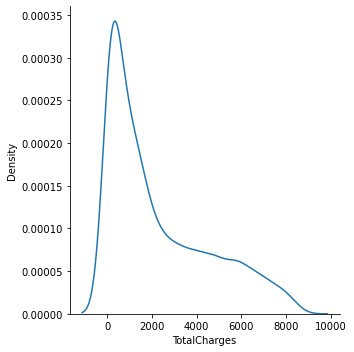

In [13]:
# plotting the graph of TotalCharges 
sns.displot(ds, x="TotalCharges", kind="kde")
plt.show()

In [14]:
# finding the median value 
np.median(ds.TotalCharges)

nan

In [15]:
# As data contains null value , skiping the null values and finding the median
ds.TotalCharges.median(skipna=True)

1397.475

In [16]:
# finding the mean value 
np.mean(ds.TotalCharges)

2283.3004408418656

Appling the median values in replacement of null values

In [17]:
# filling mean value in place of null values
ds["TotalCharges"] = ds["TotalCharges"].fillna(ds.TotalCharges.median(skipna=True))

In [18]:
# confirming the null value in dataset
ds.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Analysing the Data
We'll now plot a bar chart for each categorical column so we can see how each category in these columns impacts the Churn column.

Before plotting, we'll transform the values in the Churn column from labels Yes and No to numbers 0 and 1. We'll do the opposite with the SeniorCitizen column so the column's chart is properly labeled.

In [19]:
# Transforming the values in the Churn and SeniorCitizen columns
ds.loc[ds['Churn'] == 'No','Churn'] = 0 
ds.loc[ds['Churn'] == 'Yes','Churn'] = 1
ds['Churn'] = ds['Churn'].astype(int)
ds.loc[ds['SeniorCitizen'] == '0','SeniorCitizen'] = 'No' 
ds.loc[ds['SeniorCitizen'] == '1','SeniorCitizen'] = 'Yes'

In [20]:
ds.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


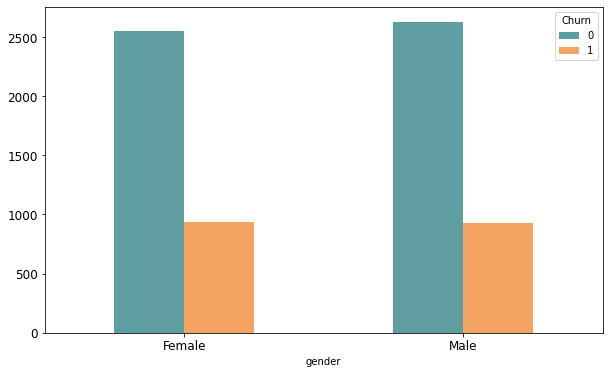

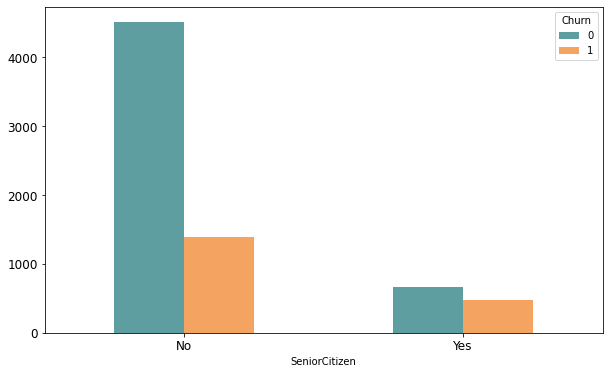

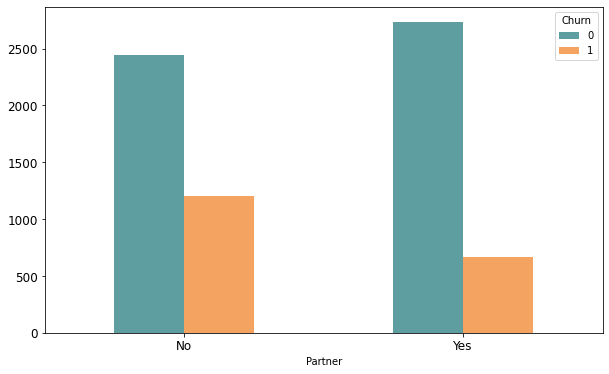

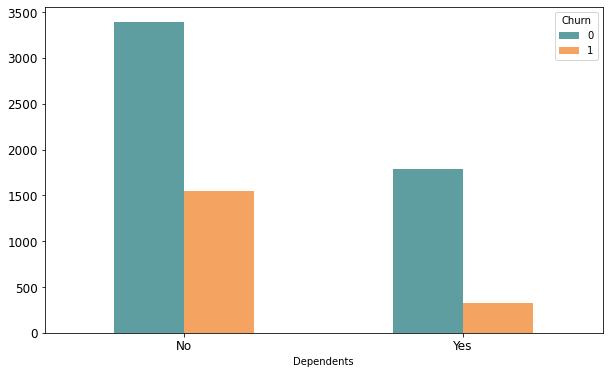

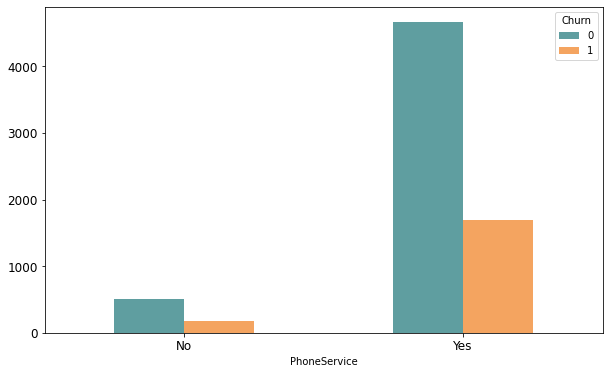

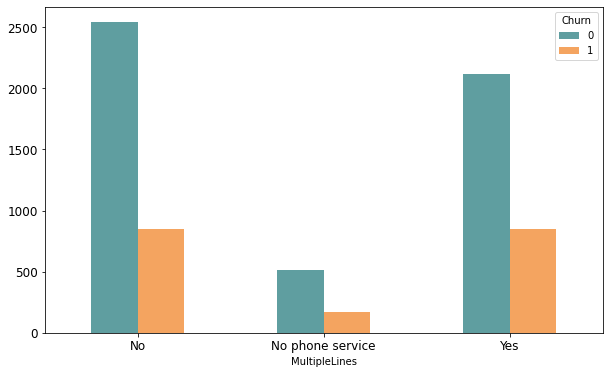

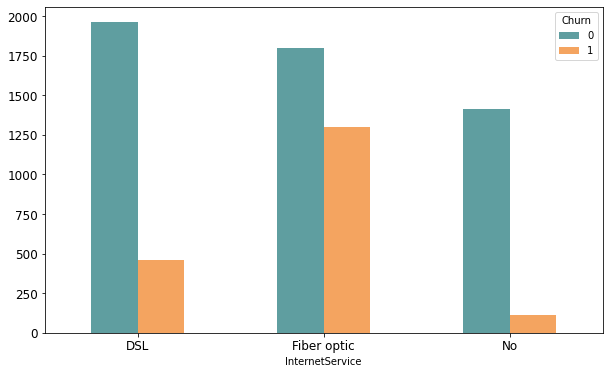

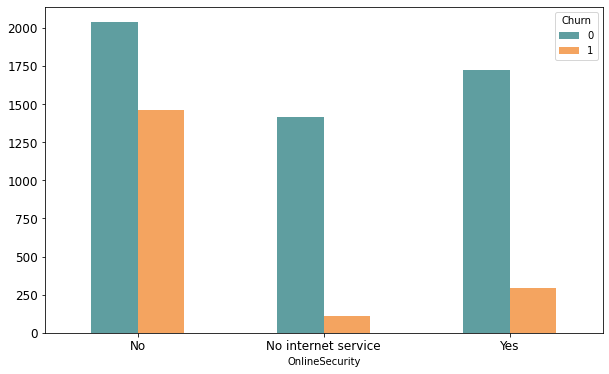

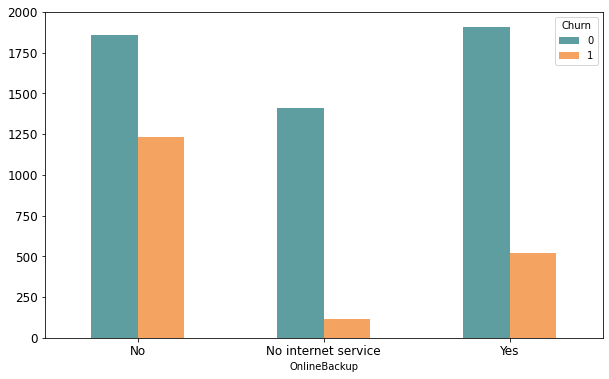

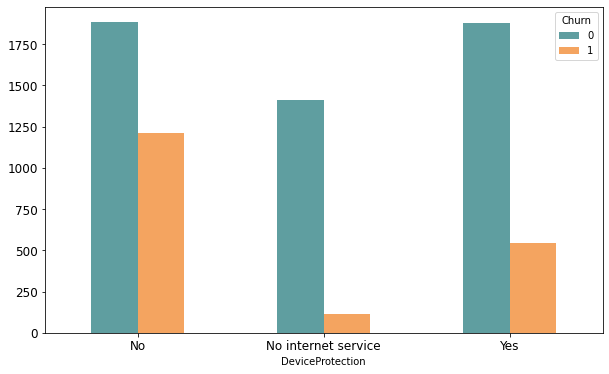

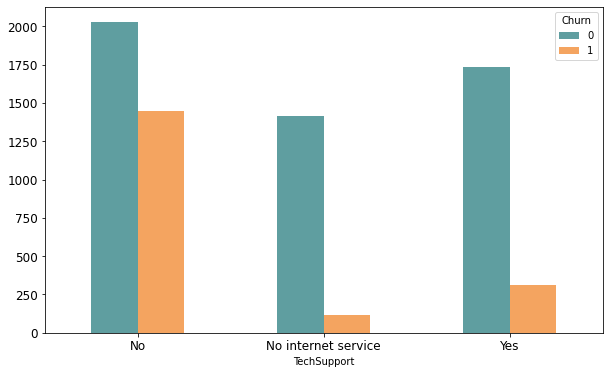

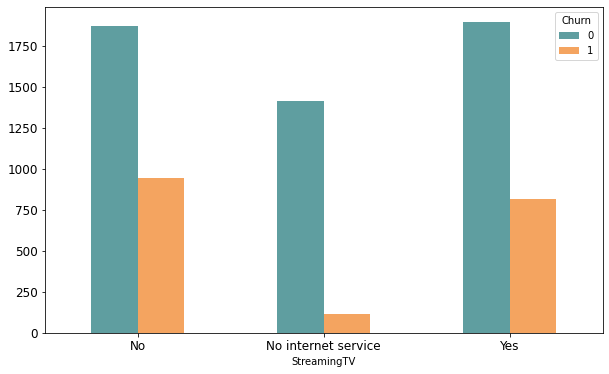

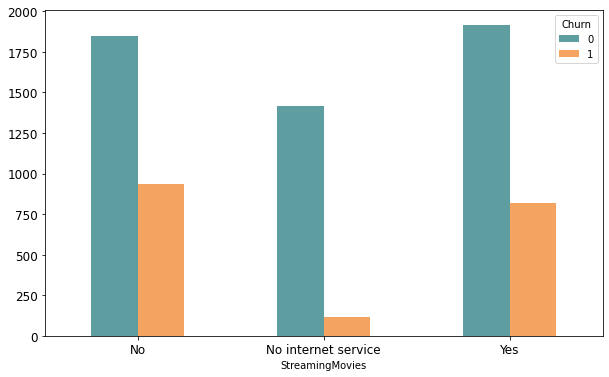

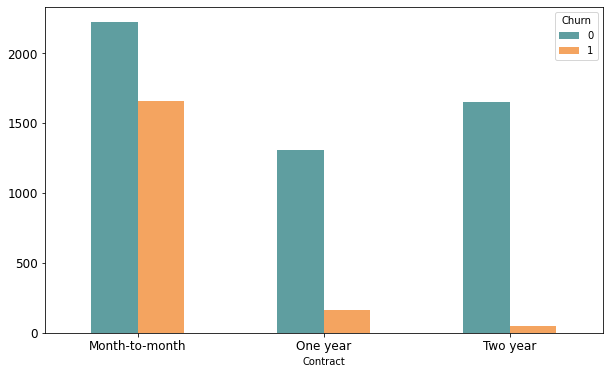

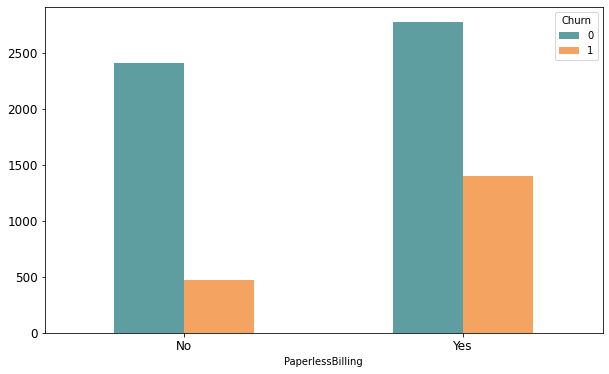

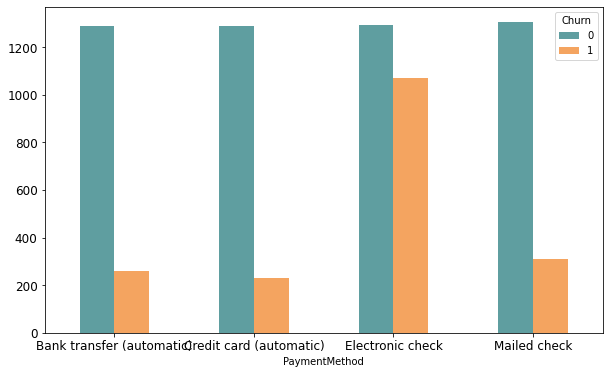

In [29]:
# doing a cross table, as business travel is a categorical variable
cat_col = ds.select_dtypes(include=object)
for column in cat_col:
    table = pd.crosstab(cat_col[column],columns=ds.Churn)
# barpot showing attrition wiith respect to business travel
    table.plot(kind = 'bar', rot = 0, figsize = (10,6), color = ['cadetblue','sandybrown'], fontsize = 12)

    plt.show()

We can learn a lot from these charts. Here are some insights:

- Customers without dependents are two times more likely to churn.
- Customers that use paperless billing and optical fiber are more likely to churn.
- Customers with no online security or backup, no device protection, and no tech support are from two to three times more likely to churn.
- Customers with no internet service are unlikely to churn.
- Customers with month-to-month contracts are almost four times more likely to churn than customers with yearly contracts. - Two-year contractors are very unlikely to churn.
- Customers that use electronic checks to pay their bills are more likely to churn.


In [27]:
ds.describe()

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2298.060617
std,24.516391,30.114702,2272.226516
min,0.000000,18.250000,18.800000
25%,9.000000,35.650000,406.275000
50%,29.000000,70.400000,1414.550000
75%,56.000000,89.900000,3841.500000
max,72.000000,118.750000,8684.800000


We observe that in above columns other than tenure, MonthlyCharges, TotalCharges are all categorical columns

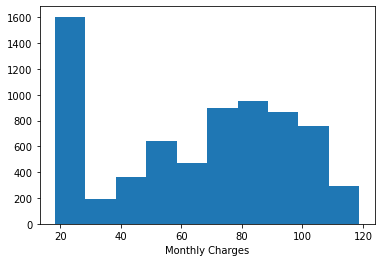

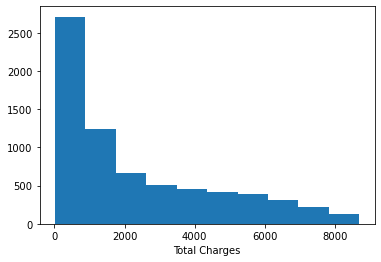

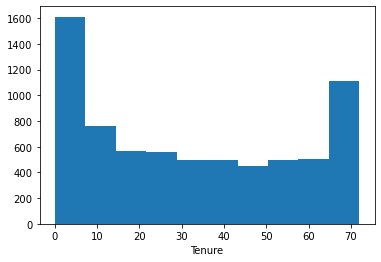

In [65]:

# plotting the histogram of MonthlyCharges
plt.hist(ds.MonthlyCharges)
plt.xlabel('Monthly Charges')
plt.show()

# plotting the histogram of TotalCharges
plt.hist(ds.TotalCharges)
plt.xlabel('Total Charges')
plt.show()

# plotting the histogram of tenure
plt.hist(ds.tenure)
plt.xlabel('Tenure')
plt.show()

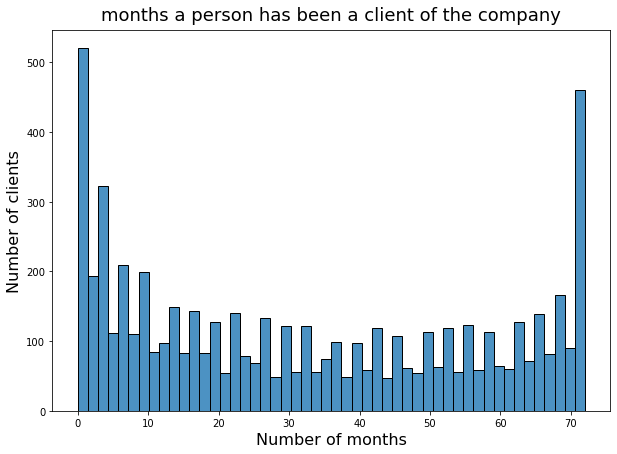

In [29]:
tenure = ds['tenure']
plt.figure(figsize=(10, 7))
sns.histplot(tenure, bins=50, alpha=0.8)
plt.title('months a person has been a client of the company', fontsize=18, pad=10)
plt.xlabel('Number of months', fontsize=16)
plt.ylabel('Number of clients', fontsize=16)
plt.show()

<ipython-input-35-7d6961fd3743>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr(),annot=True)


<AxesSubplot:>

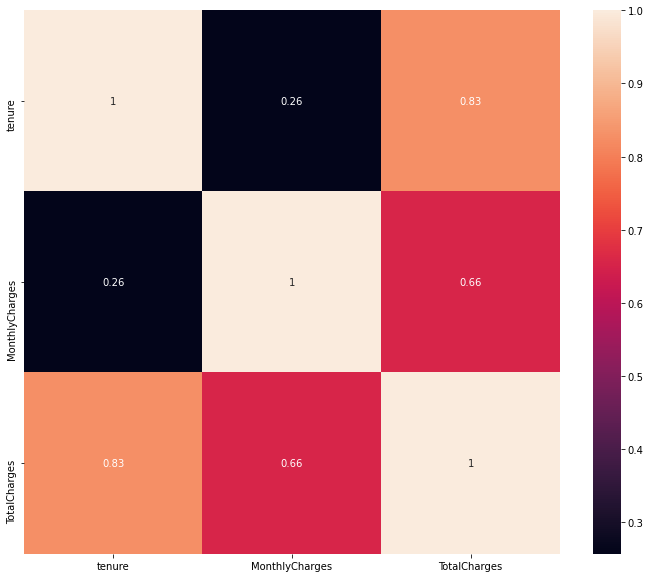

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(ds.corr(),annot=True)

## Preparing the Data

As we have seen there are many categorical data which need to be converted to readable format, for this we can use onehot encoding or lable encoder

We apply One-Hot Encoding when:
The categorical feature is not ordinal (like the countries above)

The number of categorical features is less so one-hot encoding can be effectively applied

We apply Label Encoding when:
The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)

The number of categories is quite large as one-hot encoding can lead to high memory consumption

In [30]:
#taking care of categorical values we use label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat = list(ds.dtypes[ds.dtypes == object].index)
for i in cat:
    ds[i]=le.fit_transform(ds[i])

In [31]:
ds.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [32]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int32  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [33]:
#defining dependent and independent variables
x = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [34]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


## Models and Metrics
We'll use two different machines learning algorithms:

- KNN;
- Decision Tree

## Metrics
The metric that we will use to check model performance is overall accuracy. The formula for overall accuracy is :

$$
\frac{TP+TN}{TP+FP+TN+FN}
$$

Where:
* TP: True Positives;
* TN: True Negatives;
* FN: False  Negatives;
* FP: False  Positives

# KNeighborsClassifier Model

In [66]:
# checking accuracy for different K values
n_neighbours = np.arange(1,20)
# adding the accuracy for every n neighbour to the list
ovr_k = []
for n in n_neighbours:
    
    knn = KNeighborsClassifier(n_neighbors=n)

    #fitting the model
    knn.fit(x_train , y_train)

    y_pred = knn.predict(x_test)
    #confusion matrix
    c = confusion_matrix(y_test, y_pred)
    # overall accuracy
    ovr_k.append((c[0,0]+c[1,1]) / np.sum(c))

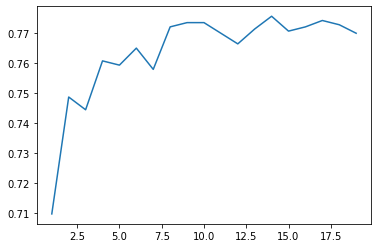

In [67]:
plt.plot(n_neighbours,np.array(ovr_k))
plt.show()

In [60]:
ovr_k

[0.7097232079489,
 0.7487579843860894,
 0.7444996451383961,
 0.7608232789212207,
 0.759403832505323,
 0.7650816181689141,
 0.7579843860894251,
 0.7721788502484032,
 0.7735982966643009,
 0.7735982966643009,
 0.7700496806245565,
 0.7665010645848119,
 0.7714691270404542,
 0.7757274662881476,
 0.7707594038325053,
 0.7721788502484032,
 0.7743080198722498,
 0.772888573456352,
 0.7700496806245565]

We can see that at  knn value of 14, the KNN gives the best result by giving an accuracy of 0.7757.

# DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
# checking accuracy for different depths
depth = np.arange(1,20)
# adding the accuracy for every depth to the list
ovr_d = []
for k in depth:
    clf = DecisionTreeClassifier(max_depth = k, min_samples_leaf=5)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    # confusion matrix
    c = confusion_matrix(y_test, y_pred)
    # Overall Accuracy
    ovr_d.append((c[0,0]+c[1,1])/np.sum(c))

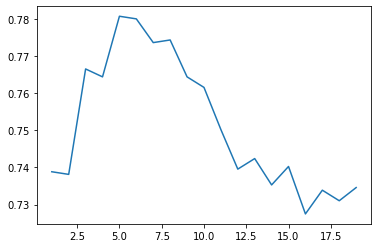

In [53]:
plt.plot(depth,np.array(ovr_d))
plt.show()

In [56]:
ovr_d

[0.7388218594748048,
 0.7381121362668559,
 0.7665010645848119,
 0.7643718949609652,
 0.7806955287437899,
 0.7799858055358411,
 0.7735982966643009,
 0.7743080198722498,
 0.7643718949609652,
 0.7615330021291696,
 0.7501774308019872,
 0.7395315826827538,
 0.7423704755145494,
 0.7352732434350603,
 0.7402413058907026,
 0.7274662881476224,
 0.7338537970191625,
 0.7310149041873669,
 0.7345635202271115]

We can see that at depth 5, the decision tree gives the best result by giving an accuracy of 0.7806.

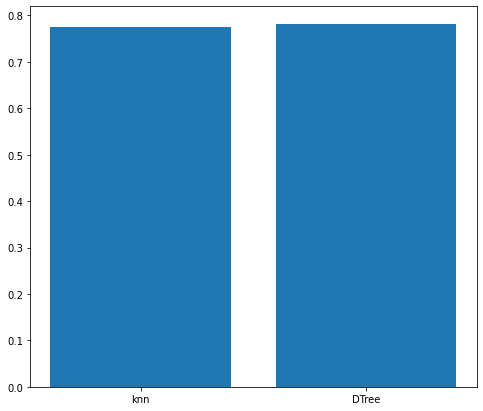

In [62]:
#comparing accuracies
plt.figure(figsize= (8,7))
ac = [ovr_k[13],ovr_d[4]]
name = ['knn','DTree']
plt.bar(name,ac)
plt.show()

AS YOU CAN SEE DecisionTreeClassifier DID BEST